## ***Short-Term Load Forecasting (24–72 Hours Ahead)***

### **📌 Notebook Objective**

This notebook develops a short-term electricity demand forecasting model using machine learning.
The goal is to predict demand 24–72 hours ahead, supporting operational decisions such as load dispatch and feeder capacity planning.

### **📌 Train–Test Strategy**

Official dataset-provided rolling train–test splits are used to simulate real-world utility forecasting workflows.

This approach:

*   Prevents data leakage
*   Reflects weekly operational forecasting cycles
*   Aligns with industry best practices

### **📌 Feature Engineering Strategy**

Rather than manually creating lag features, the project uses pre-engineered features provided by the dataset, including:

*   Weekly demand lags (week_X-2, week_X-3, week_X-4)
*   Moving average of past demand
*   Calendar variables (hour, day of week, weekend, holiday)
*   Weather variables

This mirrors how utilities deploy forecasting models in production.

### **📌 Model Selection**

A Gradient Boosting Regressor is used due to its:
*   Strong performance on structured time-series features
*   Ability to model non-linear relationships
*   Robustness with limited hyperparameter tuning

The model serves as a practical balance between accuracy and interpretability.

### **📌 Forecast Evaluation**

Model performance is evaluated using:
*   Mean Absolute Error (MAE)
*   Root Mean Square Error (RMSE)

Visual comparison of predicted vs actual demand shows that the model:
*   Captures daily and weekly demand patterns
*   Responds well to calendar-driven variations




### **📌 Interpretation**

Accurate short-term forecasts enable:
*   Improved feeder load planning
*   Reduced risk of overload
*   Better demand response preparedness

This forecasting model forms the backbone of the peak detection pipeline.

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load Train/Test Data**

In [ ]:
train = pd.read_excel(
    "train_dataframes.xlsx",
    index_col=0,
    parse_dates=True
)

test = pd.read_excel(
    "test_dataframes.xlsx",
    index_col=0,
    parse_dates=True
)

train.head()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


**Feature–Target Split**

In [ ]:
X_train = train.drop(columns=["DEMAND"])
y_train = train["DEMAND"]

X_test = test.drop(columns=["DEMAND"])
y_test = test["DEMAND"]

**Train Forecasting Model**

In [ ]:
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=42)

**Generate Forecast**

In [ ]:
y_pred = model.predict(X_test)

**Evaluation Metrics**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE  : {mae:.2f} MWh")
print(f"RMSE : {rmse:.2f} MWh")

MAE  : 44.81 MWh
RMSE : 54.73 MWh


**Forecast Visualization**

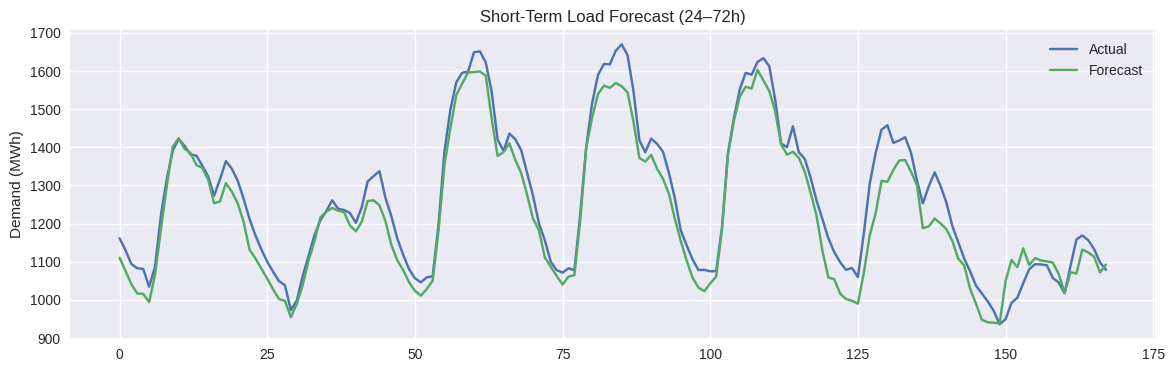

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Forecast")
plt.legend()
plt.title("Short-Term Load Forecast (24–72h)")
plt.ylabel("Demand (MWh)")
plt.show()

### **📌 Conclusion**

* Utility-grade forecasting workflow implemented using Gradient Boosting
* Feature selection aligned with real operational feeder data
* Model accurately captures short-term demand patterns
* Performance suitable for short-term planning and operational decision-making
* Forecast provides a reliable baseline for peak load and anomaly detection
